In [54]:
import pandas as pd

In [55]:
# Load the data
data1 = pd.read_excel("/Users/krishnajagarlamudi/Downloads/Book4.XLSX")
data2 = pd.read_excel("/Users/krishnajagarlamudi/Downloads/S2BLD.XLSX")

# Concatenate 2 datasets
data_new = pd.concat([data1, data2],ignore_index=True)

# Display the first few rows of the dataframe
data_new.head()


,Major:,Course ID/Section :,Gender:,Race:,I can hold as true and integrate seemingly conflicting or contradictory points of view,"To solve problems, I draw on my ability to hold, accept and go beyond paradoxes",I can offer new ways of looking at a problem,I find unusual ways to solve a problem,I display curiosity about many things,I am willing to change my mind and try something else,...,I can create a cooperative atmosphere among the members when addressing problems,I can listen to and consider other members' opinions,I am willing to ask others for help,I can trust other team members,I can set aside differences when working with others to achieve a common goal,I like experiencing cooperative learning together with my group/ friends,"In cooperative learning, I think I attain more success",I like solving problems related to group projects together with my friends in cooperative learning,More ideas occur in cooperative learning,Course ID/Section : (CSE 1300 OR CSE 1321 OR CSE 1322)
0,re,er,NaN,NaN,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,...,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,NaN
1,Information Technology,CSE 1321L/W#1,NaN,NaN,Agree,Agree,Agree,Agree,Agree,Strongly agree,...,Strongly agree,Strongly agree,Strongly agree,Neutral,Agree,Agree,Agree,Neutral,Agree,NaN
2,Industrial and Systems Engineering,CSE 1321,Female,Hispanic,Neutral,Neutral,Neutral,Neutral,Agree,Agree,...,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,Agree,NaN
3,Computer science,CSE 1300,male,Asian/white,Strongly agree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly agree,...,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Strongly agree,NaN
4,Cybersecurity,WJ1,Female,White,Agree,Agree,Agree,Agree,Agree,Strongly agree,...,Agree,Agree,Agree,Neutral,Agree,Neutral,Neutral,Neutral,Agree,NaN


In [56]:
data_new["Major:"] = data_new["Major:"].str.lower().str.strip()
data_new["Gender:"] = data_new["Gender:"].str.lower().str.strip()
data_new["Race:"] = data_new["Race:"].str.lower().str.strip()

In [57]:
# Gender mapping
gender_mapping = {
    "man": "male",
    "he/him/male": "male",
    "make": "male",
    "m": "male",
    "female ": "female",
    "male ": "male",
    "female, as observed at birth": "female",
    "male - he/him/his": "male",
    "nonbinary": "non-binary",
    "woman": "female",
    "?": "unknown",
    "femal": "female"
}

# Race mapping
race_mapping = {
    "african american": "black",
    "african american/black": "black",
    "black or african american": "black",
    "black...": "black",
    "black =": "black",
    "black/african american": "black",
    "african-american": "black",
    "african-american ": "black",
    "african american ": "black",
    "caucasian": "white",
    "white/caucasian": "white",
    "white/non-hispanic": "white",
    "white (ethnicity : hispanic)": "mixed",
    "white/ hispanic": "mixed",
    "multi-racial": "multiracial",
    "south east asian": "south asian",
    "southeast asian": "south asian",
    "b/w": "black/white",
    "mixed black and white": "black/white",
    "w": "white",
    "latino": "latin",
    "whit": "white"
    
}

# Apply the mappings
data_new["Gender:"] = data_new["Gender:"].replace(gender_mapping)
data_new["Race:"] = data_new["Race:"].replace(race_mapping)


In [58]:
# Major mappings
major_mapping_refined = {
    "bsit (information technology)": "information technology",
    "bsswe": "software engineering",
    "bachelor of science software engineering": "bachelor of science in software engineering",
    "cgdd": "computer game design and development",
    "cgdd - computer game development & design": "computer game design and development",
    "cs": "computer science",
    "cse": "computer science engineering",
    "comp sci": "computer science",
    "computer engineering ": "computer engineering",
    "computer game design": "computer game design and development",
    "computer game design & development": "computer game design and development",
    "computer game design and development": "computer game design and development",
    "computer scienc": "computer science",
    "computer science ": "computer science",
    "computer science e": "computer science",
    "computer science engineering": "computer science engineering",
    "computer science, computer engineering": "computer science and computer engineering",
    "computer science/computer engineering": "computer science and computer engineering",
    "computer scoence": "computer science",
    "computer engineering": "computer engineering",
    "computer engineering ": "computer engineering",
    "computer game design and development": "computer game design and development",
    "computer science": "computer science",
    "cyber security": "cybersecurity",
    "cyber securuty": "cybersecurity",
    "cybersecurity ": "cybersecurity",
    "electrical engineering ": "electrical engineering",
    "game design": "game design and development",
    "game design ": "game design and development",
    "game design and development ": "game design and development",
    "it": "information technology",
    "iinformation technology": "information technology",
    "information technology ": "information technology",
    "information tecnology": "information technology",
    "software eingeering": "software engineering",
    "software engineer": "software engineering",
    "software engineering ": "software engineering",
    "software engineering": "software engineering",
    "swe": "software engineering",
    "computer science engineering": "computer science and engineering",
    "cybersecurity": "cybersecurity",
    "game design and development": "game design and development",
    "information technology": "information technology",
    "mechatronics": "mechatronics engineering",
    "psychology": "psychology",
    "re": "undecided",
    "software engineering": "software engineering"
}

data_new["Major:"] = data_new["Major:"].replace(major_mapping_refined)

# Extract and display the unique values
major_unique = sorted(data_new["Major:"].dropna().unique())
gender_unique = sorted(data_new["Gender:"].dropna().unique())
race_unique = sorted(data_new["Race:"].dropna().unique())

major_unique, gender_unique, race_unique

(['bachelor of science in software engineering',
  'biology',
  'civil engineering (cs minor)',
  'computer engineering',
  'computer game design and development',
  'computer science',
  'computer science & engineering concentration: artificial intelligence',
  'computer science - game design',
  'computer science and computer engineering',
  'computer science and engineering',
  'computer science and game design (double major)',
  'computer science and human service',
  'computer science engineering',
  'computer software engineering',
  'criminal justice',
  'cybersecurity',
  'electrical engineering',
  'game design and development',
  'industrial and systems engineering',
  'industrial engineering',
  'information technology',
  'information technology (cybersecurity focus)',
  'it (cybersecurity)',
  'math and cgdd',
  'mathematics',
  'mechanical engineering',
  'mechatronics and robotics engineering',
  'mechatronics engineering',
  'physics',
  'psychology',
  'software engine

In [59]:
# Define a mapping for the Likert scale responses
likert_mapping = {
    "Strongly disagree": 1,
    "Disagree": 2,
    "Neutral": 3,
    "Agree": 4,
    "Strongly agree": 5
}

# Apply the mapping to the Likert scale columns
likert_columns = data_new.columns[4:]
data_new[likert_columns] = data_new[likert_columns].replace(likert_mapping)

# Display the first few rows of the dataframe to confirm the changes
data_new.head()


,Major:,Course ID/Section :,Gender:,Race:,I can hold as true and integrate seemingly conflicting or contradictory points of view,"To solve problems, I draw on my ability to hold, accept and go beyond paradoxes",I can offer new ways of looking at a problem,I find unusual ways to solve a problem,I display curiosity about many things,I am willing to change my mind and try something else,...,I can create a cooperative atmosphere among the members when addressing problems,I can listen to and consider other members' opinions,I am willing to ask others for help,I can trust other team members,I can set aside differences when working with others to achieve a common goal,I like experiencing cooperative learning together with my group/ friends,"In cooperative learning, I think I attain more success",I like solving problems related to group projects together with my friends in cooperative learning,More ideas occur in cooperative learning,Course ID/Section : (CSE 1300 OR CSE 1321 OR CSE 1322)
0,undecided,er,NaN,NaN,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,Strongly disagree,...,1,1,1,1,1,1,1,1,1,NaN
1,information technology,CSE 1321L/W#1,NaN,NaN,4,4,4,4,4,5,...,5,5,5,3,4,4,4,3,4,NaN
2,industrial and systems engineering,CSE 1321,female,hispanic,3,3,3,3,4,4,...,4,4,4,4,4,4,4,4,4,NaN
3,computer science,CSE 1300,male,asian/white,5,5,4,5,5,5,...,5,5,5,5,5,5,5,5,5,NaN
4,cybersecurity,WJ1,female,white,4,4,4,4,4,5,...,4,4,4,3,4,3,3,3,4,NaN


In [60]:
import numpy as np
import matplotlib.pyplot as plt

In [61]:
# Exclude the column capturing course IDs from the Likert scale columns list
likert_columns = likert_columns[:-1]

# 1. Convert all Likert scale responses to numeric values
data_new[likert_columns] = data_new[likert_columns].apply(pd.to_numeric, errors='coerce')

# 2. Flatten the Likert scale responses into a single array (from a DataFrame format to a 1D array)
likert_data_flat = data_new[likert_columns].values.flatten()

# 3. Filter out any NaN values from the array (this step ensures that any non-numeric values are excluded)
likert_data_flat = likert_data_flat[~np.isnan(likert_data_flat)]

# 4. Count the number of each type of response (from 1 to 5)
category_counts = pd.value_counts(likert_data_flat, sort=False)

# 5. Calculate the percentage distribution of each type of response
overall_percentages = (category_counts / len(likert_data_flat)) * 100

# 6. Sort the percentages in ascending order of response type
overall_percentages.sort_index()


1.0     1.488988
2.0     6.754232
3.0    18.224537
4.0    42.688105
5.0    30.844137
dtype: float64

In [62]:
# Function to calculate percentage for each category based on Major, Gender and Race
def calculate_percentages(category_field, category):
    # Filter the main data to get rows that match the given category and value.
    # For instance, if category_field is "Major:" and category is "Engineering",
    # it fetches all rows of students majoring in Engineering.
    data_category = data_new[data_new[category_field] == category][likert_columns]
    
    # Convert the 2D data (rows of Likert responses) to a 1D array for ease of processing.
    likert_data_flat = data_category.values.flatten()
    
    # Remove any NaN values from the array. This is essential for accurate percentage calculation.
    likert_data_flat = likert_data_flat[~np.isnan(likert_data_flat)]
    
    # Calculate the total number of responses in the flattened array.
    total_responses_category = len(likert_data_flat)
    
    # Count the occurrences of each Likert scale response (e.g., how many times was "Strongly Agree" chosen).
    category_counts = pd.value_counts(likert_data_flat, sort=False)
    
    # Calculate the percentage for each Likert scale response.
    percentages = (category_counts / total_responses_category) * 100
    
    # Return the sorted percentages. This ensures the order is from "Strongly disagree" to "Strongly agree".
    return percentages.sort_index()

# For each unique Major in the dataset, apply the calculate_percentages function.
# This computes the percentage distribution of Likert responses for every Major.
major_percentages = {major: calculate_percentages("Major:", major) for major in major_unique}

# Similarly, calculate the percentages for each unique value in the "Gender:" category.
gender_percentages = {gender: calculate_percentages("Gender:", gender) for gender in gender_unique}

# Similarly, calculate the percentages for each unique value in the "Race:" category.
race_percentages = {race: calculate_percentages("Race:", race) for race in race_unique}

major_percentages, gender_percentages, race_percentages


({'bachelor of science in software engineering': 3.0    12.0
  4.0    26.0
  5.0    62.0
  dtype: float64,
  'biology': 1.0     4.0
  2.0    10.0
  3.0    12.0
  4.0    22.0
  5.0    52.0
  dtype: float64,
  'civil engineering (cs minor)': 2.0    10.0
  3.0    16.0
  4.0    18.0
  5.0    56.0
  dtype: float64,
  'computer engineering': 1.0     0.267023
  2.0     5.607477
  3.0    17.890521
  4.0    39.919893
  5.0    36.315087
  dtype: float64,
  'computer game design and development': 1.0     1.335559
  2.0    11.352254
  3.0    21.702838
  4.0    42.404007
  5.0    23.205342
  dtype: float64,
  'computer science': 1.0     1.340861
  2.0     6.337332
  3.0    16.640790
  4.0    42.808751
  5.0    32.872265
  dtype: float64,
  'computer science & engineering concentration: artificial intelligence': 2.0     6.0
  3.0    16.0
  4.0    24.0
  5.0    54.0
  dtype: float64,
  'computer science - game design': 1.0    14.0
  2.0    48.0
  3.0    22.0
  4.0    16.0
  dtype: float64,
  'compute

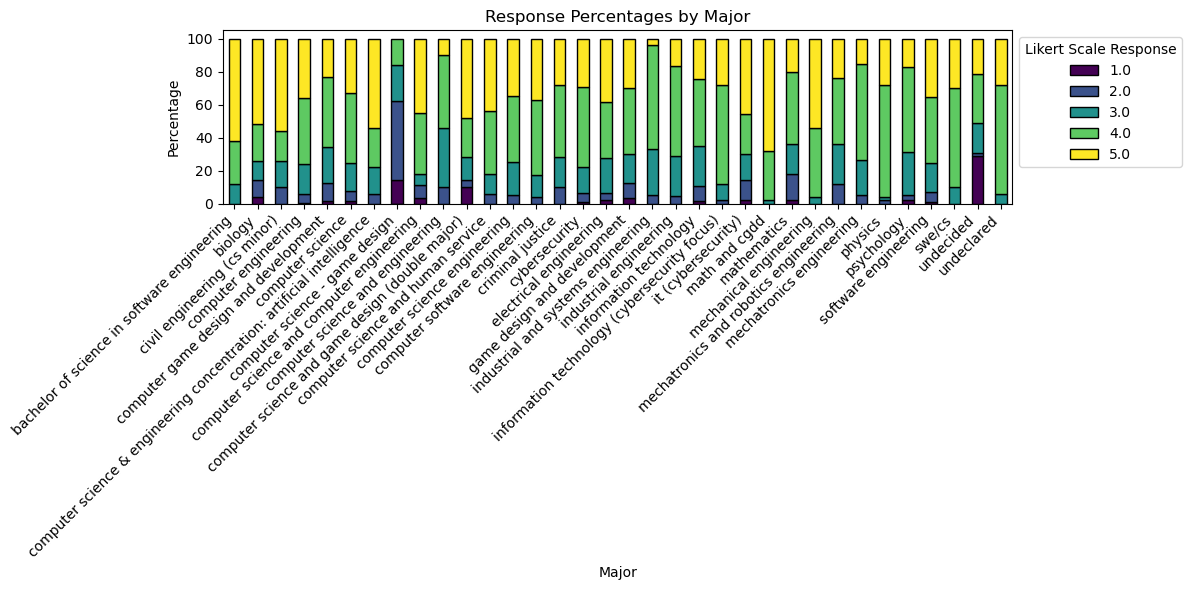

In [63]:
# Converting the major_percentages dictionary to a DataFrame for easy plotting
major_percentages_df = pd.DataFrame(major_percentages).transpose().fillna(0)

# Plotting the response percentages for each major as a stacked bar chart
major_percentages_df.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis', edgecolor='black')

# Adding details to the plot
plt.title('Response Percentages by Major')
plt.ylabel('Percentage')
plt.xlabel('Major')
plt.legend(title='Likert Scale Response', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


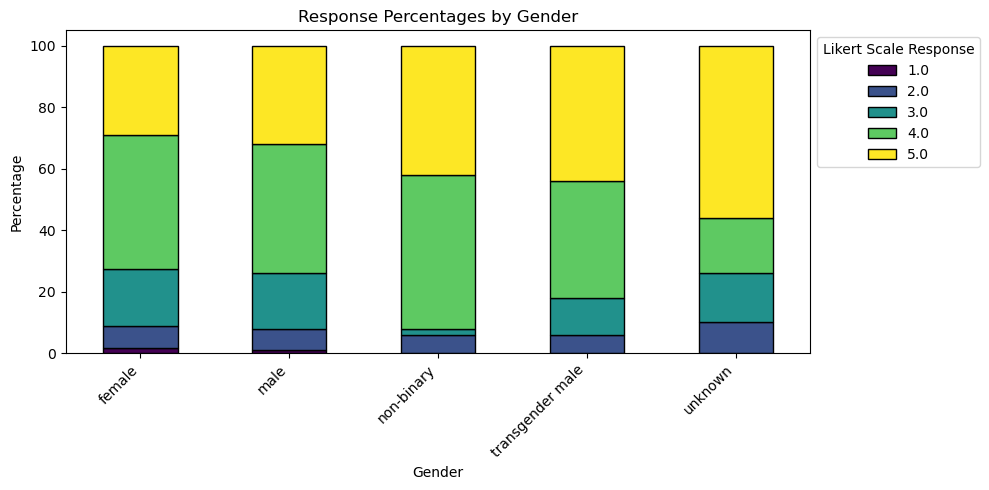

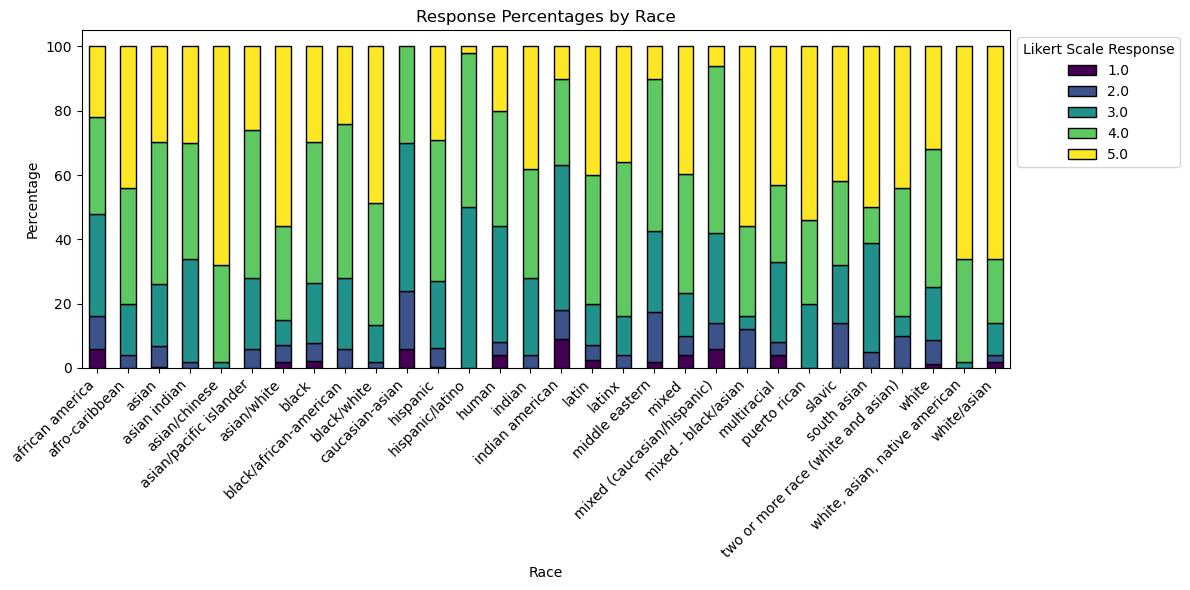

In [64]:
# Converting the gender_percentages and race_percentages dictionaries to DataFrames for easy plotting
gender_percentages_df = pd.DataFrame(gender_percentages).transpose().fillna(0)
race_percentages_df = pd.DataFrame(race_percentages).transpose().fillna(0)

# Plotting the response percentages for each gender
gender_percentages_df.plot(kind='bar', stacked=True, figsize=(10, 5), cmap='viridis', edgecolor='black')

# Adding details to the plot
plt.title('Response Percentages by Gender')
plt.ylabel('Percentage')
plt.xlabel('Gender')
plt.legend(title='Likert Scale Response', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

# Plotting the response percentages for each race
race_percentages_df.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='viridis', edgecolor='black')

# Adding details to the plot
plt.title('Response Percentages by Race')
plt.ylabel('Percentage')
plt.xlabel('Race')
plt.legend(title='Likert Scale Response', loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()
